# Question a : Compléter l'analyse exploratoire en se focalisant sur les relations des différentes variables avec la variable cible "Price"
### Analyse exploratoire des relations entre les variables et la variable cible "Price"
### Pour cette étape, nous allons explorer les relations entre les différentes variables et la variable cible "Price". Cela inclut l'analyse de la distribution de "Price" et des relations entre "Price" et les autres variables explicatives.

C:\Users\anasa\AppData\Local\Temp\ipykernel_23256\2768817464.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\anasa\AppData\Local\Temp\ipykernel_23256\2768817464.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

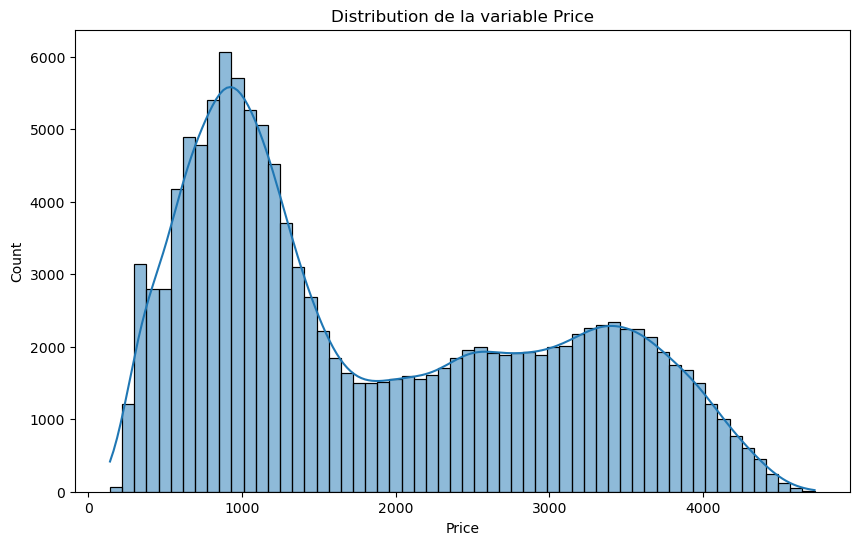

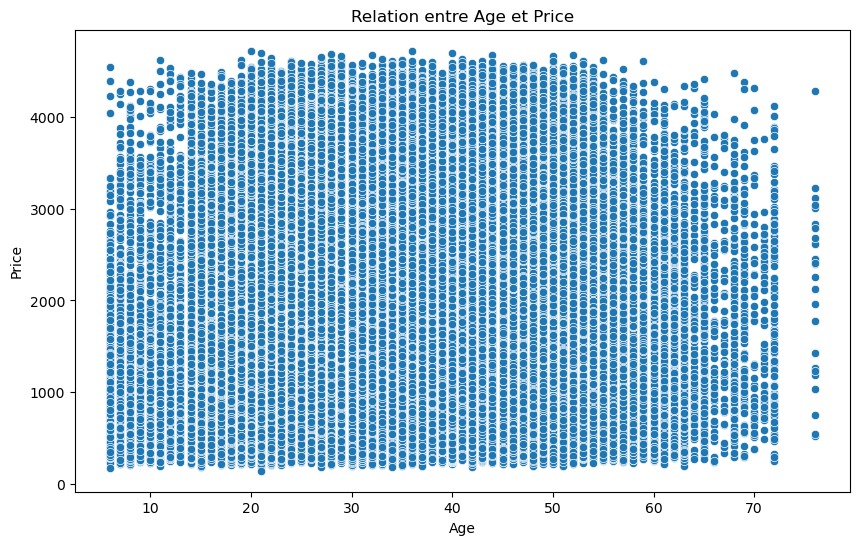

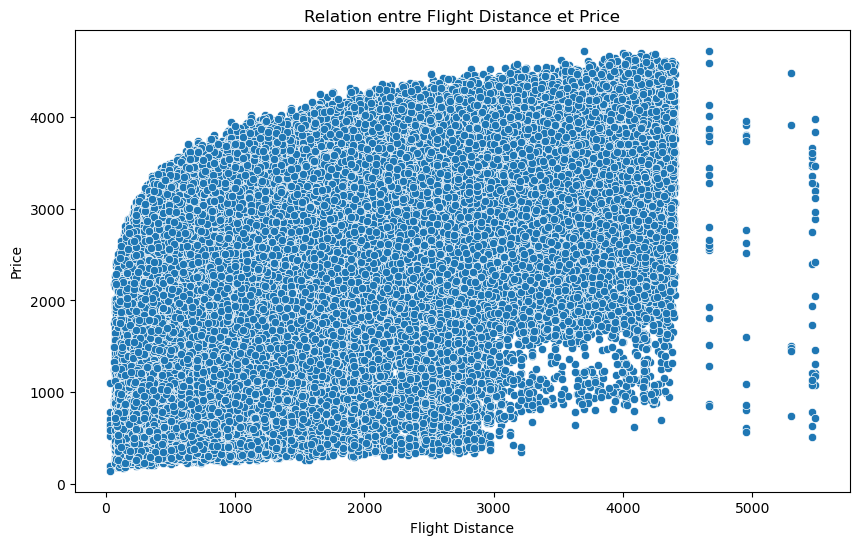

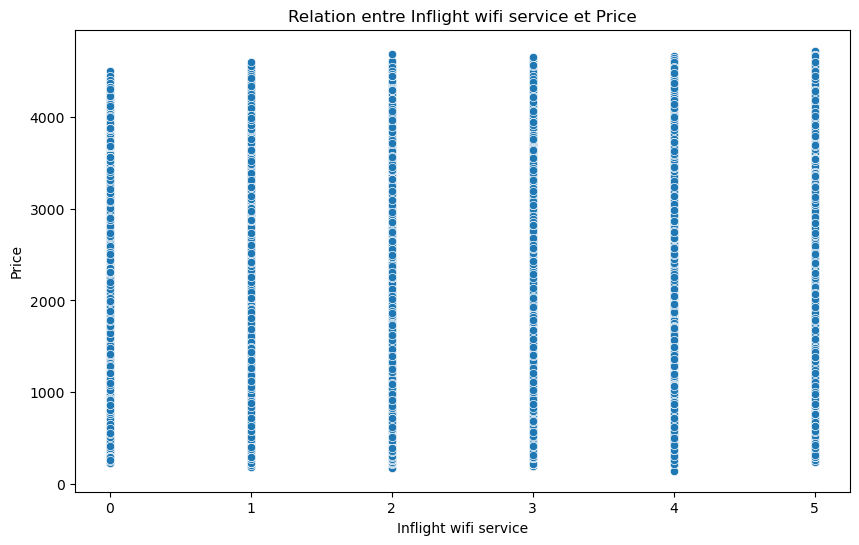

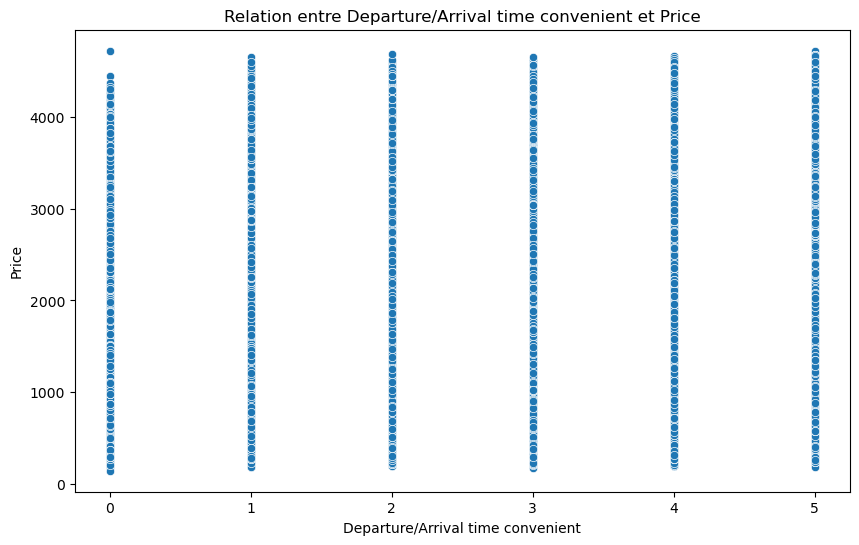

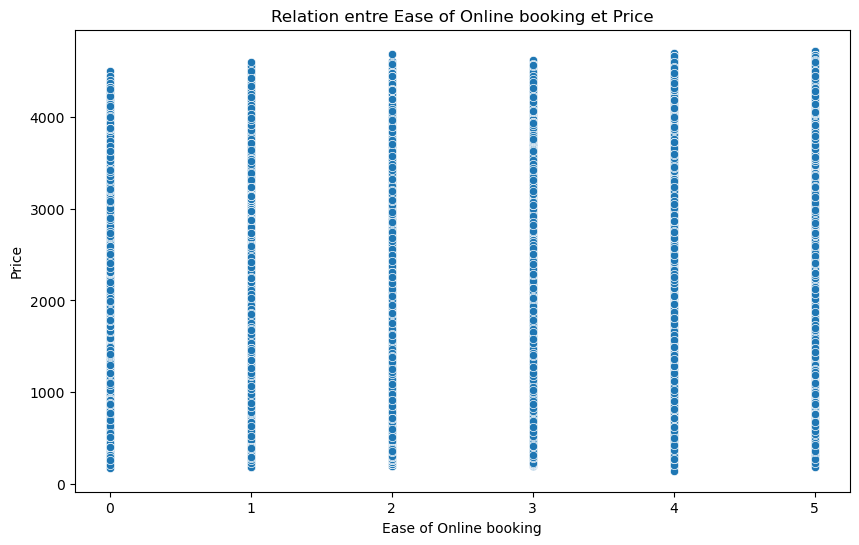

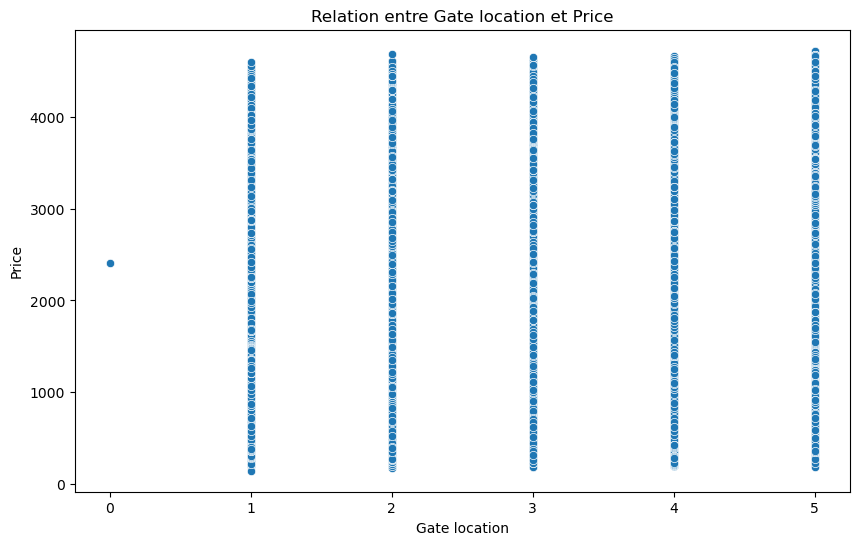

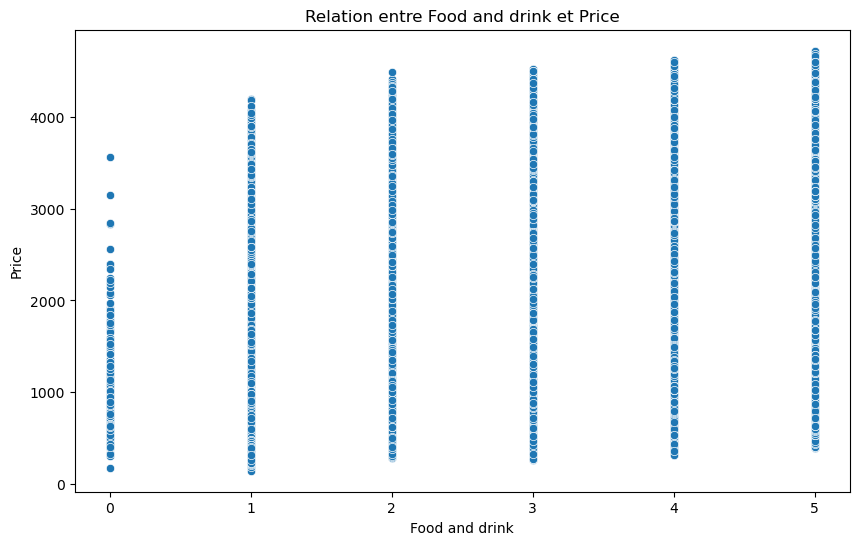

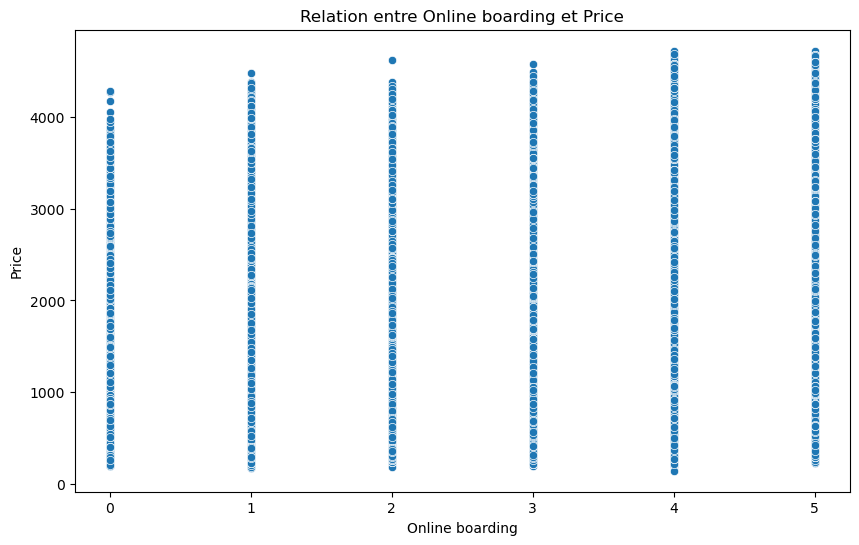

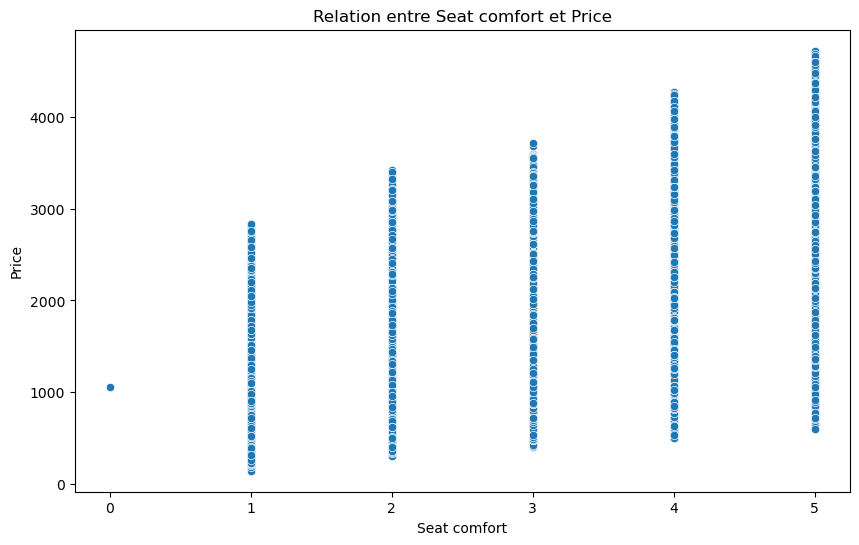

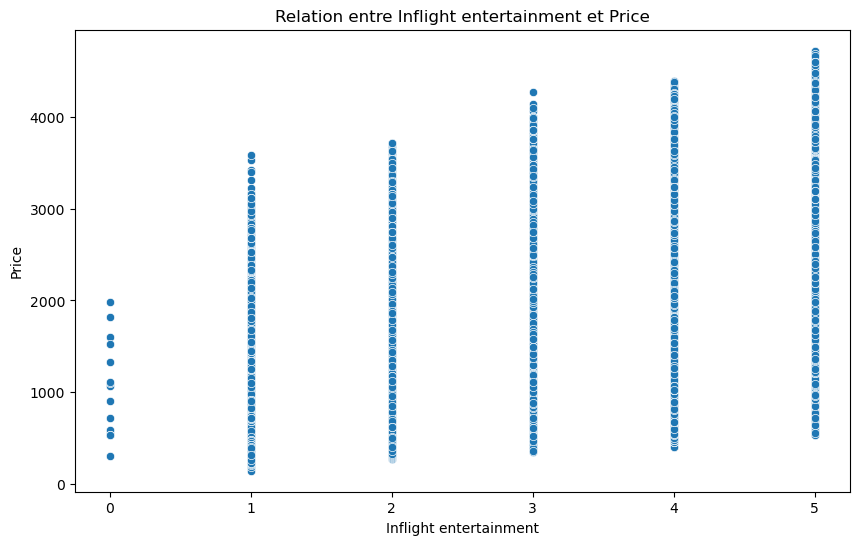

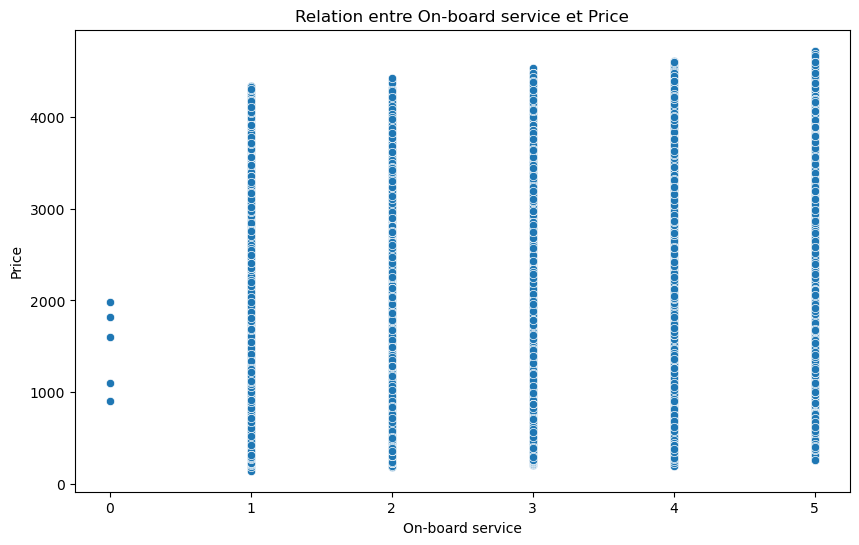

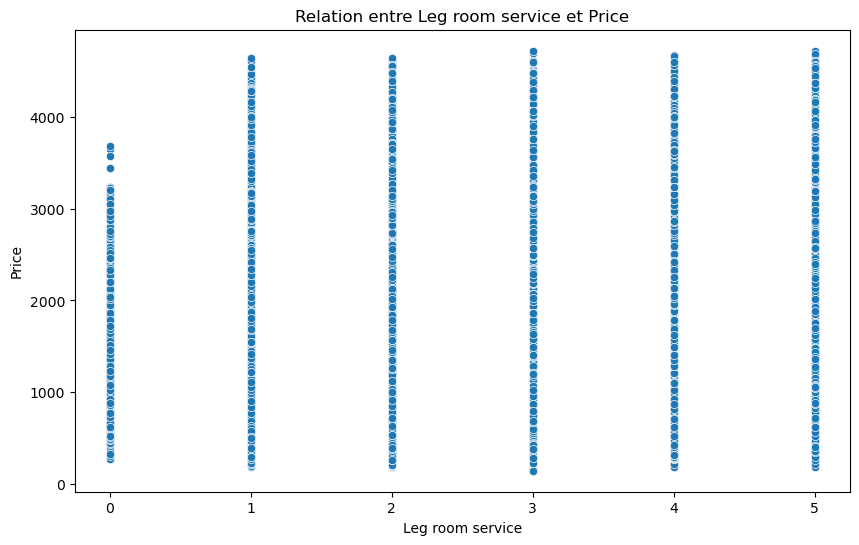

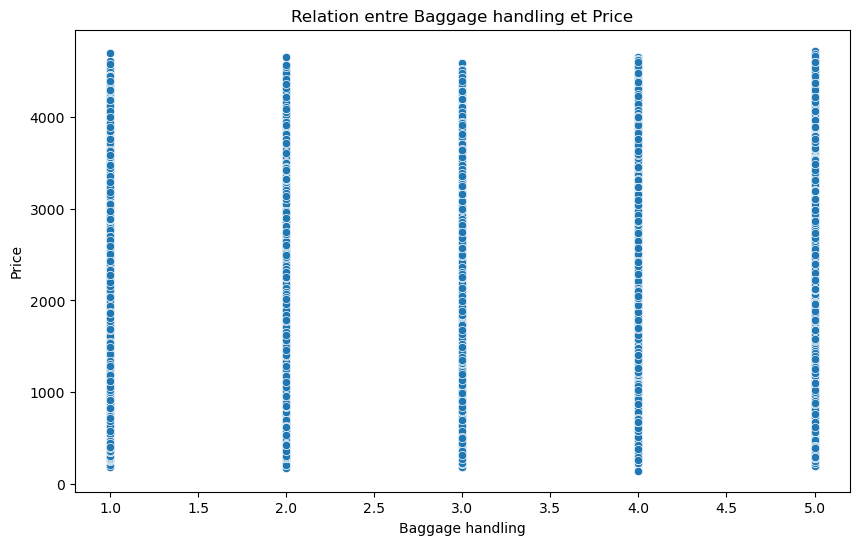

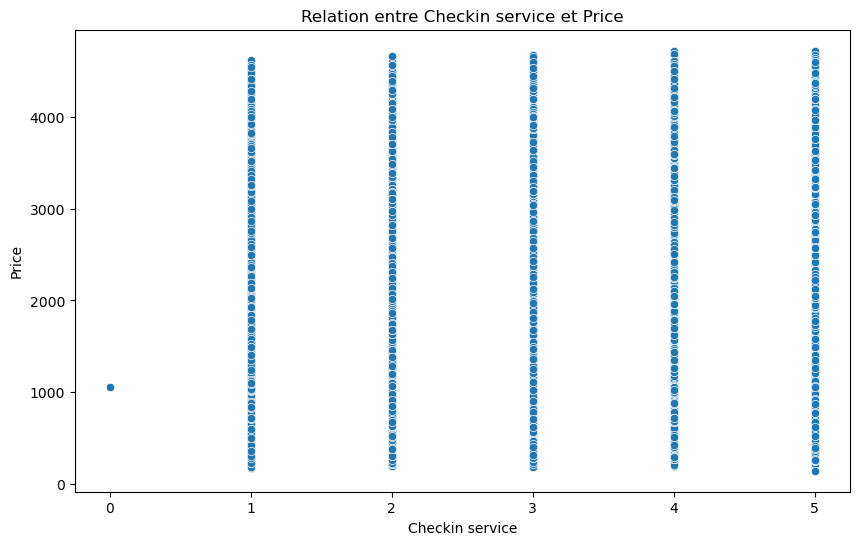

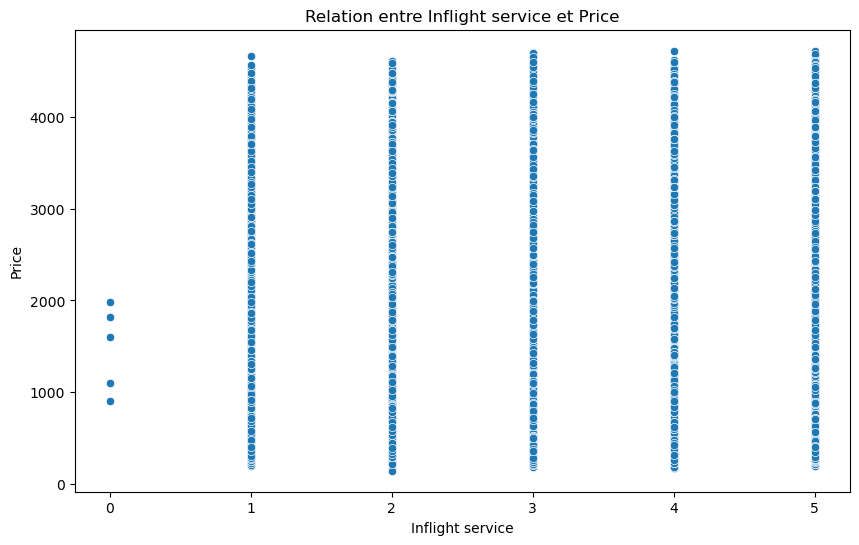

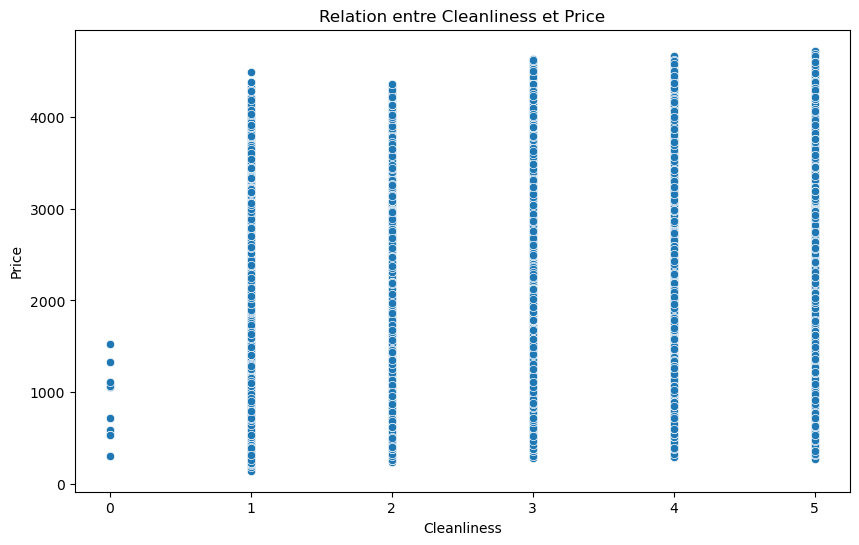

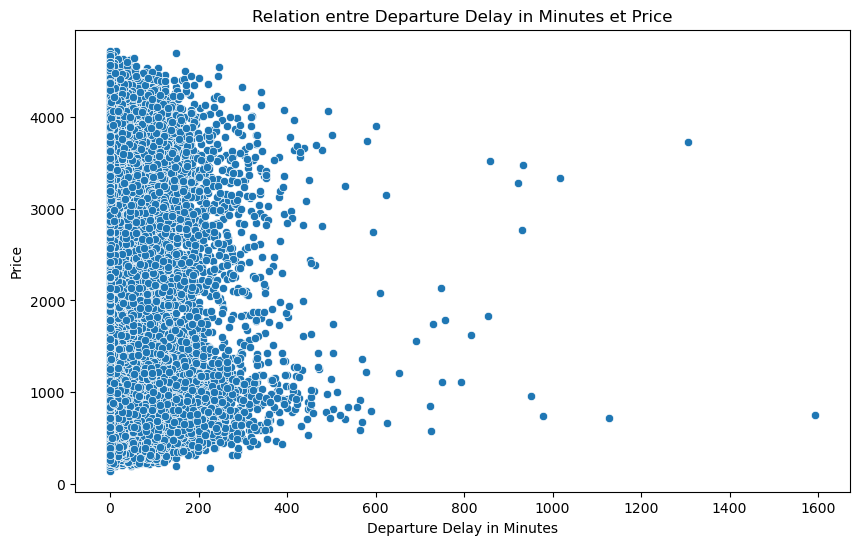

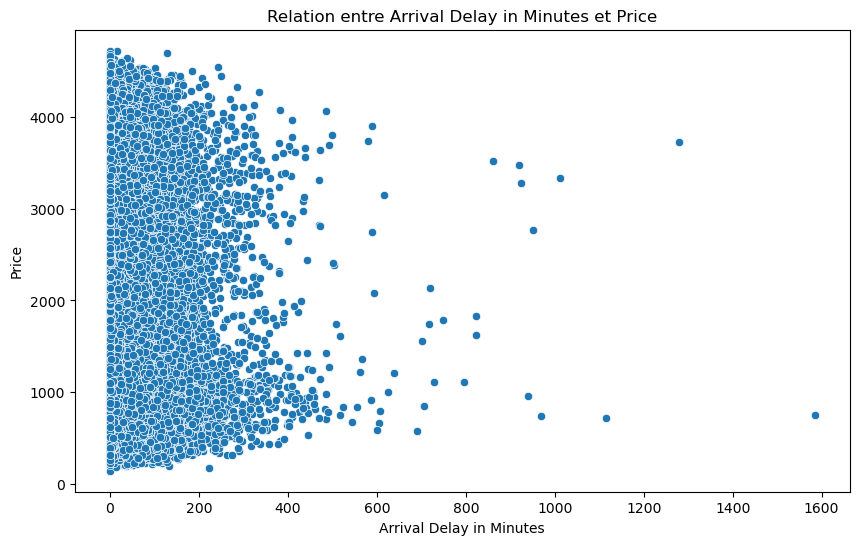

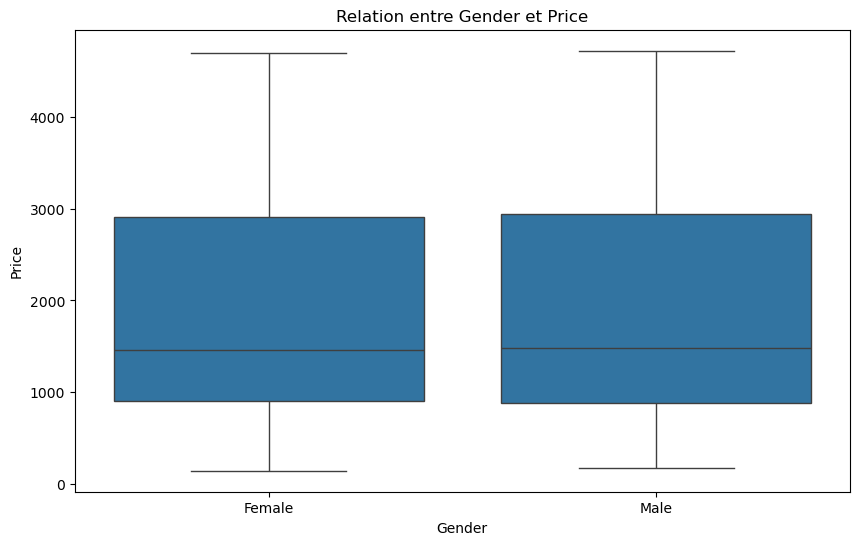

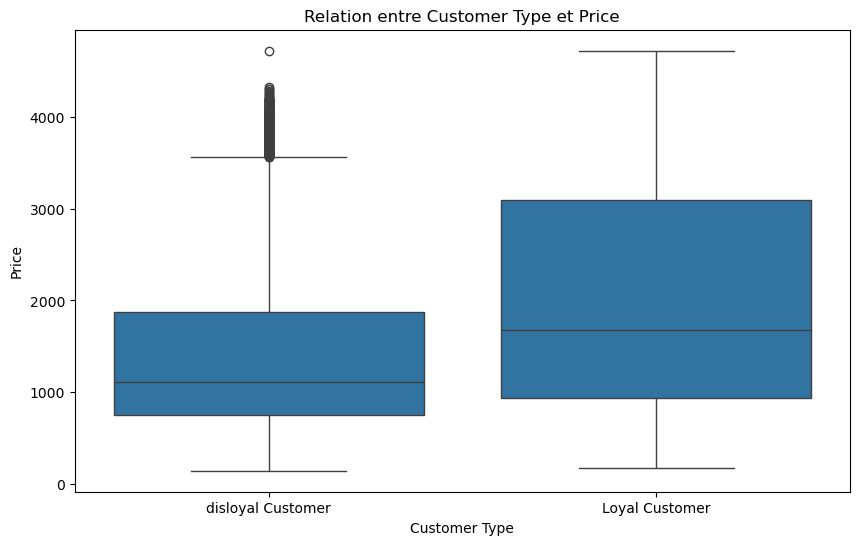

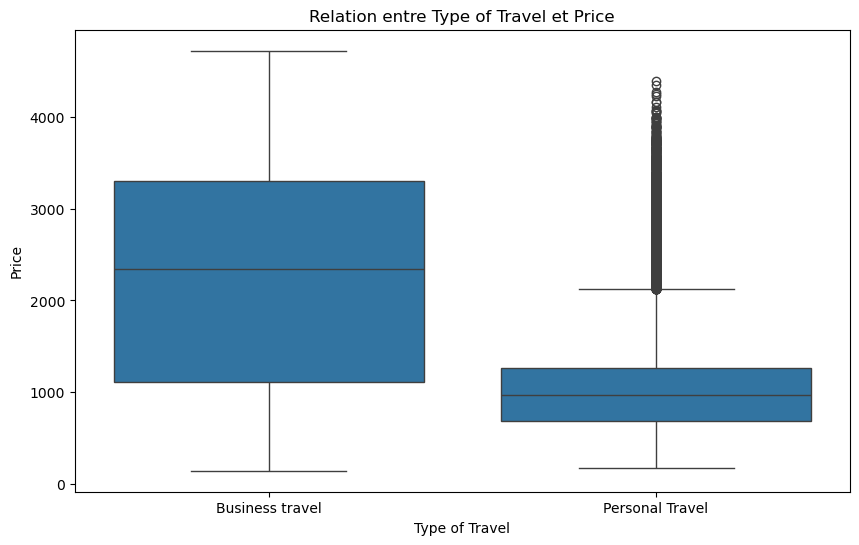

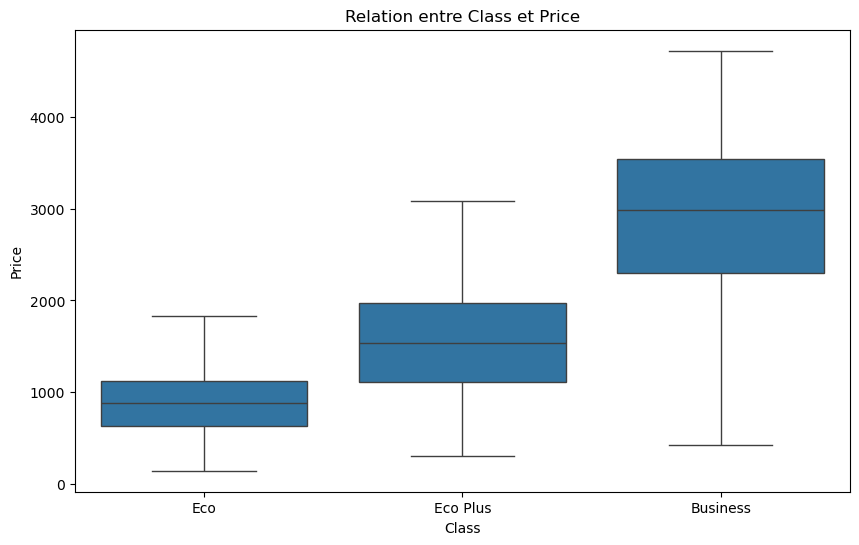

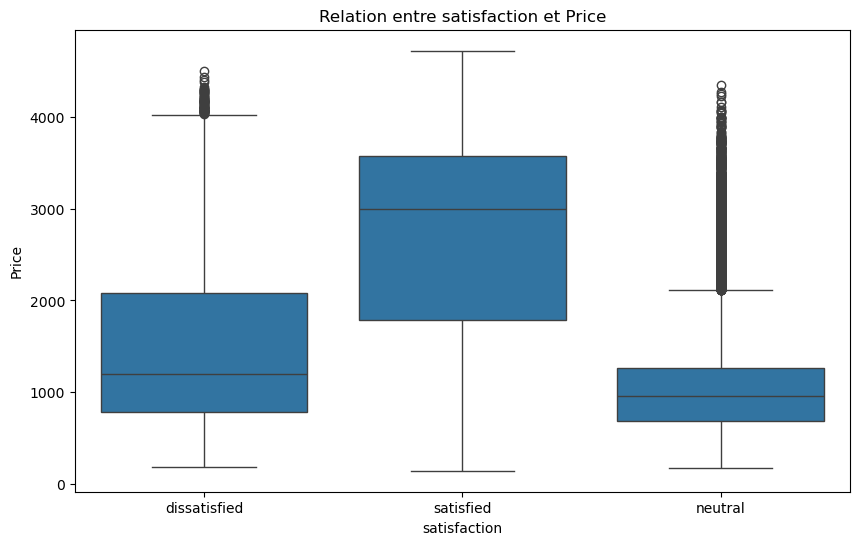

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv('./MP-4MLSP.csv')

# Suppression des colonnes inutiles
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

# Imputation des valeurs manquantes par la médiane pour les variables numériques
for col in ['Age', 'Ease of Online booking', 'Gate location', 'Leg room service', 'Arrival Delay in Minutes']:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)

# Distribution de la variable cible
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution de la variable Price')
plt.show()

# Relations entre les variables numériques et Price
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if col != 'Price':  # Exclure la variable cible de l'analyse
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=col, y='Price')
        plt.title(f'Relation entre {col} et Price')
        plt.show()

# Relations entre les variables catégorielles et Price
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col, y='Price')
    plt.title(f'Relation entre {col} et Price')
    plt.show()


# Question b : Prétraiter les données
### Nous allons choisir les variables explicatives, procéder à l'imputation des valeurs manquantes, et normaliser les variables.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Sélection des variables explicatives et de la variable cible
X = df.drop('Price', axis=1)
y = df['Price']

# Encoder les variables catégorielles
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Imputation des valeurs manquantes avec la médiane
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Normalisation des variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Question c : Appliquer les différents algorithmes de régression
### Nous allons appliquer plusieurs algorithmes de régression et évaluer les performances de chaque modèle en utilisant différentes métriques (MSE, MAE, etc.).

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Définition des hyperparamètres pour GridSearchCV
param_grid_lr = {}
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
param_grid_lasso = {'alpha': [0.1, 1, 10, 100]}
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
param_grid_svr = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Initialisation des modèles
models = {
    'Linear Regression': (LinearRegression(), param_grid_lr),
    'Ridge Regression': (Ridge(), param_grid_ridge),
    'Lasso Regression': (Lasso(), param_grid_lasso),
    'Random Forest': (RandomForestRegressor(), param_grid_rf),
    'Support Vector Regressor': (SVR(), param_grid_svr)
}

# Application des modèles et évaluation des performances
results = {}

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        'Best Model': best_model,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }

    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R2: {r2}")
    print("\n" + "="*60 + "\n")

Model: Linear Regression
Best Parameters: {}
MSE: 196913.41866696725
MAE: 341.66769023007157
R2: 0.8540022920793577


Model: Ridge Regression
Best Parameters: {'alpha': 10}
MSE: 196913.31377740589
MAE: 341.67542215609933
R2: 0.8540023698477275


Model: Lasso Regression
Best Parameters: {'alpha': 0.1}
MSE: 196910.11130310947
MAE: 341.6872777601373
R2: 0.8540047442613663


